In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
# size = 400
# center = (size // 2, size // 2)

# def make_circle(size):
#   image = np.zeros((size, size, 3), dtype=np.uint8)
#   image = cv2.circle(image, center, size // 3, (255, 255, 255), -1)
#   return image

# image = make_circle(size)

# plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# plt.title('Circles')
# plt.axis('off')
# plt.show()

In [4]:
# # Function to add landmarks to the smiley face image
# def add_landmarks(image, center, size, points):
#     landmarks = {}

#     # Add points along the perimeter of the circle
#     perimeter_points = []
#     for angle in range(0, 360, points):  # Adjust the step size as needed
#         x = int(center[0] + (size // 3) * np.cos(np.deg2rad(angle)))
#         y = int(center[1] + (size // 3) * np.sin(np.deg2rad(angle)))
#         perimeter_points.append((x, y))

#     # Add perimeter points to landmarks
#     for i, point in enumerate(perimeter_points):
#         landmarks[f'perimeter_{i}'] = point
#         cv2.circle(image, point, 3, (0, 0, 255), -1)
#         cv2.putText(image, str(i), (point[0] + 5, point[1] + 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)


#     # Draw landmarks on the image
#     for landmark, (x, y) in landmarks.items():
#         cv2.circle(image, (x, y), 3, (0, 0, 255), -1)

#     return image, landmarks



In [5]:
# image1, landmarks = add_landmarks(image, center, size, 30)

# plt.figure(figsize=(10, 5))

# plt.subplot(1, 2, 1)
# plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
# plt.title('Circle with Landmarks')
# plt.axis('off')


In [6]:
# Function to add landmarks to the smiley face image
def add_landmarks_ellipse(image, center, radius1, radius2, size, points):
    landmarks = {}

    # Add points along the perimeter of the circle
    perimeter_points = []
    for angle in range(0, 360, points):  # Adjust the step size as needed
        x = int(center[0] + radius1 * np.cos(np.deg2rad(angle)))
        y = int(center[1] + radius2 * np.sin(np.deg2rad(angle)))
        perimeter_points.append((x, y))

    # Add perimeter points to landmarks
    for i, point in enumerate(perimeter_points):
        landmarks[f'perimeter_{i}'] = point
        # cv2.putText(image, str(i), (point[0] + 5, point[1] + 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)

    # Draw landmarks on the image
    for landmark, (x, y) in landmarks.items():
        cv2.circle(image, (x, y), 3, (0, 0, 255), -1)


    return image, landmarks

/var/folders/ds/1rfpq6cs6r93kl9yypy1lg2m0000gq/T/ipykernel_42841/2582288773.py:25: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 3, i+1)


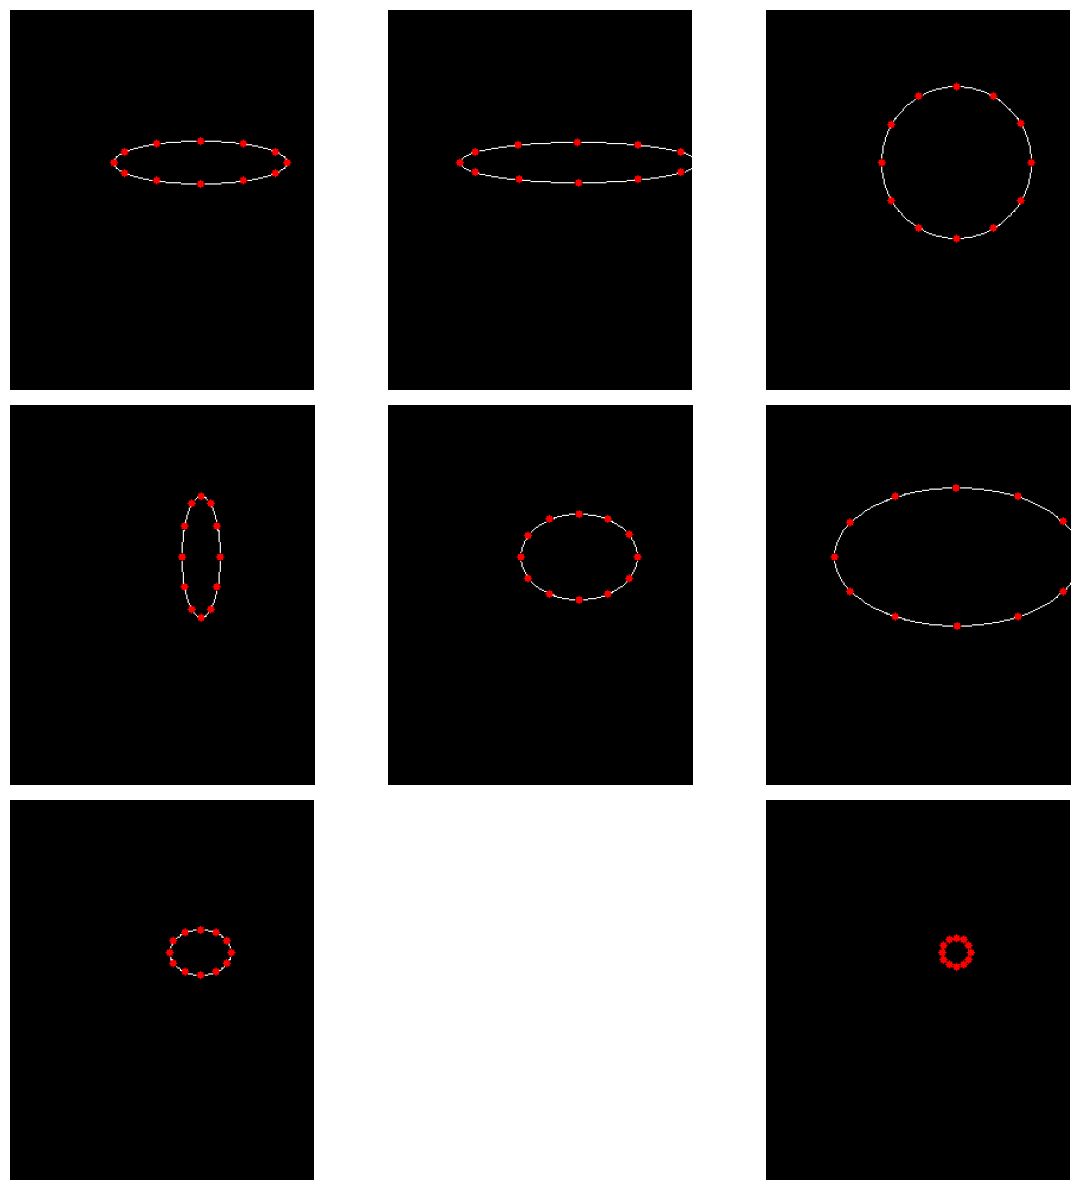

In [15]:
def generate_circles_and_ellipses(size, num_circles):
    circles = []
    for i in range(num_circles):
        image = np.zeros((size[0], size[1], 3), dtype=np.uint8) 
        center = (size[0] // 2, size[1] // 2)
        radius1 = np.random.randint(10, size[0] // 3)
        radius2 = np.random.randint(10, size[1] // 3)
        # print(radius1, radius2)
        # image = cv2.circle(image, center, radius, (255, 255, 255), -1)
        image = cv2.ellipse(image, center, (radius1, radius2), 0, 0, 360, (255, 255, 255), 1)

        # add landmarks 
        image, _ = add_landmarks_ellipse(image, center, radius1, radius2, size, 30)
        circles.append(image)
    return circles



n=9
circles = generate_circles_and_ellipses((320,256), n)
plt.figure(figsize=(12, 12))
plt.subplots_adjust(hspace=0.5)

for i, circle in enumerate(circles):
    plt.subplot(3, 3, i+1)
    plt.imshow(cv2.cvtColor(circle, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.tight_layout()



# plt.show()



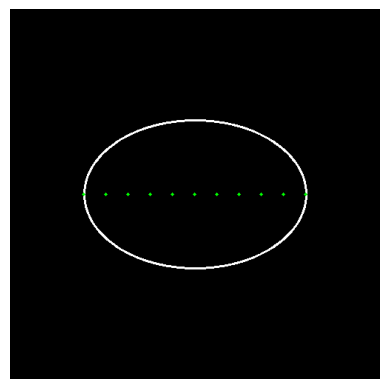

In [12]:
# Create a black image
img = np.zeros((500, 500, 3), dtype=np.uint8)

# Draw an ellipse
center = (250, 250)
axes = (150, 100)
angle = 0
startAngle = 0
endAngle = 360
color = (255, 255, 255)
thickness = 2
cv2.ellipse(img, center, axes, angle, startAngle, endAngle, color, thickness)

# Get the contour points of the ellipse
contours, _ = cv2.findContours(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
ellipse_contour = contours[0]

# Get the bounding rectangle of the ellipse
x, y, w, h = cv2.boundingRect(ellipse_contour)

# Determine leftmost and rightmost points
leftmost_point = (x, y + h // 2)
rightmost_point = (x + w, y + h // 2)

# Generate points along the line with spacing

line_points = []
for i in range(leftmost_point[0], rightmost_point[0] + 1, 30):
    line_points.append((i, leftmost_point[1]))

# Draw points on the image
for point in line_points:
    cv2.circle(img, point, 2, (0, 255, 0), -1)


# Display the image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


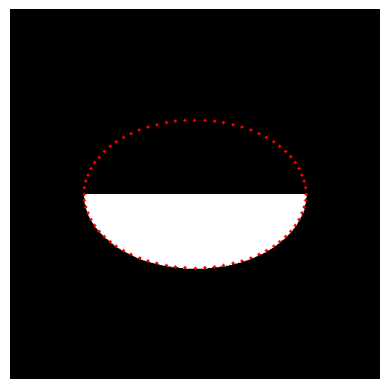

In [11]:
import cv2
import numpy as np

# Create a black image
image = np.zeros((500, 500, 3), dtype=np.uint8)

# Define the parameters of the ellipse
center = (250, 250)
axes = (150, 100)
angle = 0
startAngle = 0
endAngle = 180
color = (255, 255, 255)
thickness = -1

# Draw the ellipse on the image
cv2.ellipse(image, center, axes, angle, startAngle, endAngle, color, thickness)

# Sample points along the ellipse
points = []
for angle_deg in range(0, 360, 5):  # Sample points every 5 degrees
    angle_rad = np.deg2rad(angle_deg)
    x = int(center[0] + axes[0] * np.cos(angle_rad))
    y = int(center[1] + axes[1] * np.sin(angle_rad))
    points.append((x, y))

# Draw the sampled points on the image
for point in points:
    cv2.circle(image, point, 2, (0, 0, 255), -1)

# Display the result
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off') 
plt.show()


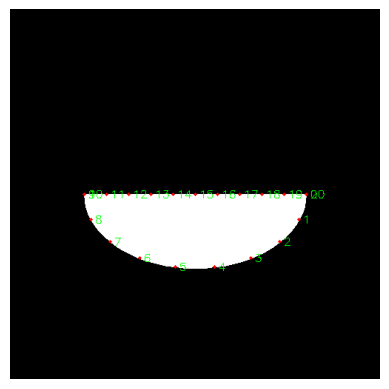

In [10]:
# Create a black image
image = np.zeros((500, 500, 3), dtype=np.uint8)

# Define the parameters of the ellipse
center = (250, 250)
axes = (150, 100)
angle = 0
startAngle = 0
endAngle = 180  # Half of the ellipse
color = (255, 255, 255)
thickness = -1  # Fill the ellipse

# Draw the ellipse on the image
cv2.ellipse(image, center, axes, angle, startAngle, endAngle, color, thickness)

# Number of points to sample on the curve
num_curve_points = 20

# Sample points along the curved part of the ellipse
curve_points = []
for angle_deg in range(0, 181, 20):
    angle_rad = np.deg2rad(angle_deg)
    x = int(center[0] + axes[0] * np.cos(angle_rad))
    y = int(center[1] + axes[1] * np.sin(angle_rad))
    curve_points.append((x, y))

# Number of points to sample on the straight part
num_straight_points = len(curve_points)

# Sample points along the straight part of the ellipse
# straight_points = [(x, center[1]) for x in range(center[0], center[0] + axes[0] + 1, int(axes[0] / num_straight_points))]
straight_points = [(x, center[1]) for x in range(center[0] - axes[0], center[0] + axes[0] + 1, int((2 * axes[0]) / num_straight_points))]

# Combine curve and straight points
points = curve_points + straight_points

# Draw the sampled points on the image
for i, point in enumerate(points):
    cv2.circle(image, point, 2, (0, 0, 255), -1)
    cv2.putText(image, str(i), (point[0] + 5, point[1] + 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)


# Display the result
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

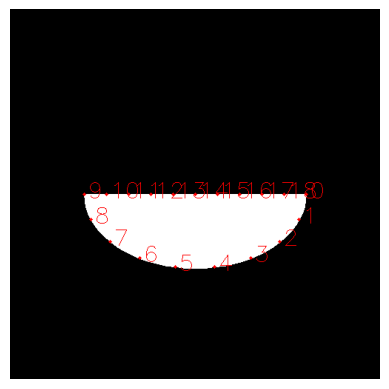

In [19]:
# Create a black image
image = np.zeros((500, 500, 3), dtype=np.uint8)

# Define the parameters of the ellipse
center = (250, 250)
axes = (150, 100)
angle = 0
startAngle = 0
endAngle = 180  # Half of the ellipse
color = (255, 255, 255)
thickness = -1  # Fill the ellipse

# Draw the ellipse on the image
cv2.ellipse(image, center, axes, angle, startAngle, endAngle, color, thickness)

# Sample points along the curved part of the ellipse
curve_points = []
for angle_deg in range(0, 181, 20):
    angle_rad = np.deg2rad(angle_deg)
    x = int(center[0] + axes[0] * np.cos(angle_rad))
    y = int(center[1] + axes[1] * np.sin(angle_rad))
    curve_points.append((x, y))

# Number of points to sample on the straight part
num_straight_points = len(curve_points)

# Sample points along the straight part of the ellipse
straight_points = [(x, center[1]) for x in range(center[0] - axes[0], center[0] + axes[0] + 1, int((2 * axes[0]) / num_straight_points))]

# Create a set to keep track of added points
added_points = set()

# Combine curve and straight points while avoiding duplicates
points = []
for point in curve_points + straight_points:
    if point not in added_points:
        points.append(point)
        added_points.add(point)

# Draw the sampled points on the image
for i, point in enumerate(points):
    cv2.circle(image, point, 2, (0, 0, 255), -1)
    cv2.putText(image, str(i), (point[0] + 5, point[1] + 5), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 1)

# Display the result
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
